In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving EC data.csv to EC data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['EC data.csv']))

In [ ]:
#df = pd.read_csv('ElectricCarData_Clean.csv')
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [ ]:
df.shape

(98, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            98 non-null     object 
 1   Model            98 non-null     object 
 2   AccelSec         98 non-null     float64
 3   TopSpeed_KmH     98 non-null     int64  
 4   Range_Km         98 non-null     int64  
 5   Efficiency_WhKm  98 non-null     int64  
 6   FastCharge_KmH   98 non-null     int64  
 7   RapidCharge      98 non-null     object 
 8   PowerTrain       98 non-null     object 
 9   PlugType         98 non-null     object 
 10  BodyStyle        98 non-null     object 
 11  Segment          98 non-null     object 
 12  Seats            98 non-null     int64  
 13  PriceEuro        98 non-null     int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 10.8+ KB


In [ ]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [ ]:
df.describe(include = 'all')

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
count,98,98,98.000000,98.000000,98.000000,98.000000,98.000000,98,98,98,98,98,98.000000,98.000000
unique,32,97,NaN,NaN,NaN,NaN,NaN,1,3,4,9,8,NaN,NaN
top,Tesla,e-Soul 64 kWh,NaN,NaN,NaN,NaN,NaN,Yes,AWD,Type 2 CCS,SUV,C,NaN,NaN
freq,13,2,NaN,NaN,NaN,NaN,NaN,98,41,90,45,30,NaN,NaN
mean,NaN,NaN,7.046939,181.653061,350.153061,189.867347,456.734694,NaN,NaN,NaN,NaN,NaN,4.959184,57324.683673
std,NaN,NaN,2.483895,43.248527,118.217984,30.055837,201.262897,NaN,NaN,NaN,NaN,NaN,0.687418,34288.246370
min,NaN,NaN,2.100000,123.000000,170.000000,104.000000,170.000000,NaN,NaN,NaN,NaN,NaN,4.000000,20129.000000
25%,NaN,NaN,5.100000,150.000000,258.750000,168.000000,275.000000,NaN,NaN,NaN,NaN,NaN,5.000000,35000.000000
50%,NaN,NaN,7.300000,167.000000,350.000000,181.000000,440.000000,NaN,NaN,NaN,NaN,NaN,5.000000,45000.000000
75%,NaN,NaN,8.950000,200.000000,407.500000,206.000000,560.000000,NaN,NaN,NaN,NaN,NaN,5.000000,65465.000000


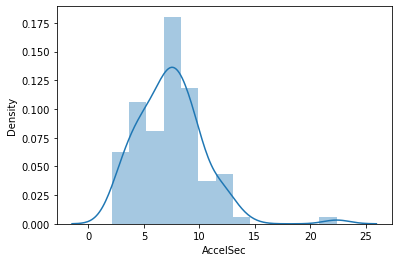

In [ ]:
sns.distplot(df['AccelSec'])

<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='Density'>

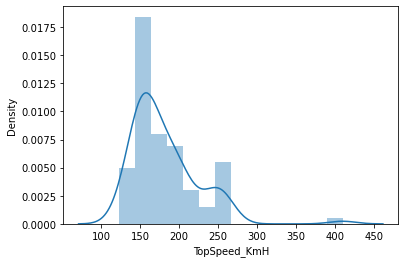

In [ ]:
sns.distplot(df['TopSpeed_KmH'])

<AxesSubplot:xlabel='Efficiency_WhKm', ylabel='count'>

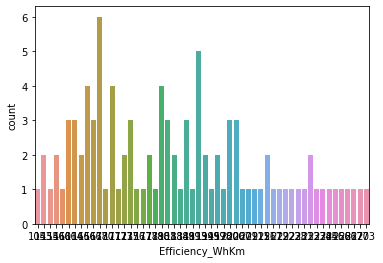

In [ ]:

sns.countplot(df['Efficiency_WhKm'])

<AxesSubplot:xlabel='PowerTrain', ylabel='count'>

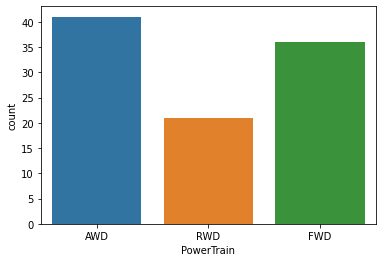

In [ ]:
sns.countplot(df['PowerTrain'])

<AxesSubplot:xlabel='RapidCharge', ylabel='count'>

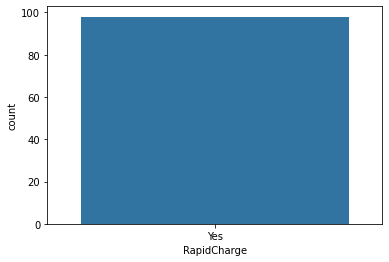

In [ ]:
sns.countplot(df['RapidCharge'])

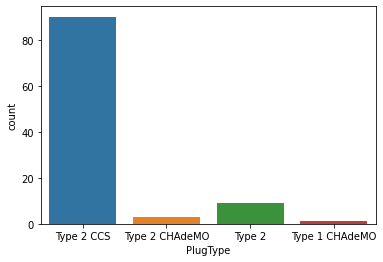

In [ ]:
sns.countplot(df['PlugType'])

<AxesSubplot:xlabel='BodyStyle', ylabel='count'>

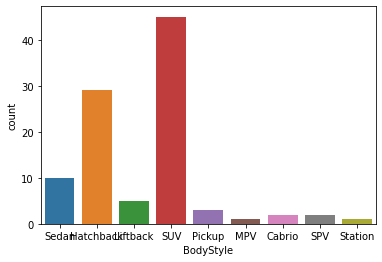

In [ ]:
sns.countplot(df['BodyStyle'])

<AxesSubplot:xlabel='Segment', ylabel='count'>

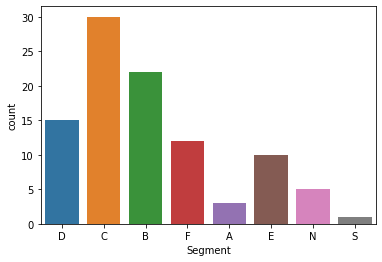

In [ ]:
sns.countplot(df['Segment'])

<AxesSubplot:xlabel='PriceEuro', ylabel='Density'>

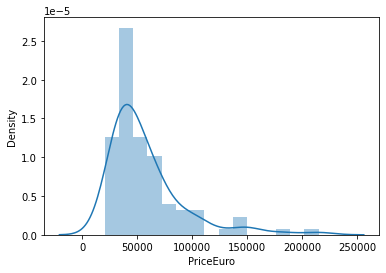

In [ ]:
sns.distplot(df['PriceEuro'])

In [ ]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['PowerTrain']= label_encoder.fit_transform(df['PowerTrain'])
df['PlugType']= label_encoder.fit_transform(df['PlugType'])
df['BodyStyle']= label_encoder.fit_transform(df['BodyStyle'])
df['Segment']= label_encoder.fit_transform(df['Segment'])

In [ ]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,0,2,7,3,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,2,2,1,2,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,0,2,2,3,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,2,2,6,3,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,2,2,1,1,4,32997


In [ ]:
df.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
AccelSec,1.000000,-0.844706,-0.656763,-0.439087,-0.768397,0.538941,0.026496,-0.358813,-0.598939,-0.046564,-0.683177
TopSpeed_KmH,-0.844706,1.000000,0.729297,0.343488,0.769719,-0.532118,-0.178448,0.304158,0.692207,0.023792,0.822229
Range_Km,-0.656763,0.729297,1.000000,0.296230,0.698120,-0.385620,-0.110401,0.149523,0.634600,0.154212,0.662957
Efficiency_WhKm,-0.439087,0.343488,0.296230,1.000000,0.307342,-0.378042,-0.102691,0.356114,0.630230,0.290138,0.384342
FastCharge_KmH,-0.768397,0.769719,0.698120,0.307342,1.000000,-0.419962,-0.042738,0.365286,0.627396,0.096641,0.651613
PowerTrain,0.538941,-0.532118,-0.385620,-0.378042,-0.419962,1.000000,0.134781,-0.295113,-0.461971,-0.171109,-0.537812
PlugType,0.026496,-0.178448,-0.110401,-0.102691,-0.042738,0.134781,1.000000,-0.066713,-0.339867,-0.363249,-0.129115
BodyStyle,-0.358813,0.304158,0.149523,0.356114,0.365286,-0.295113,-0.066713,1.000000,0.364106,0.258632,0.288515
Segment,-0.598939,0.692207,0.634600,0.630230,0.627396,-0.461971,-0.339867,0.364106,1.000000,0.340281,0.754310
Seats,-0.046564,0.023792,0.154212,0.290138,0.096641,-0.171109,-0.363249,0.258632,0.340281,1.000000,-0.086514


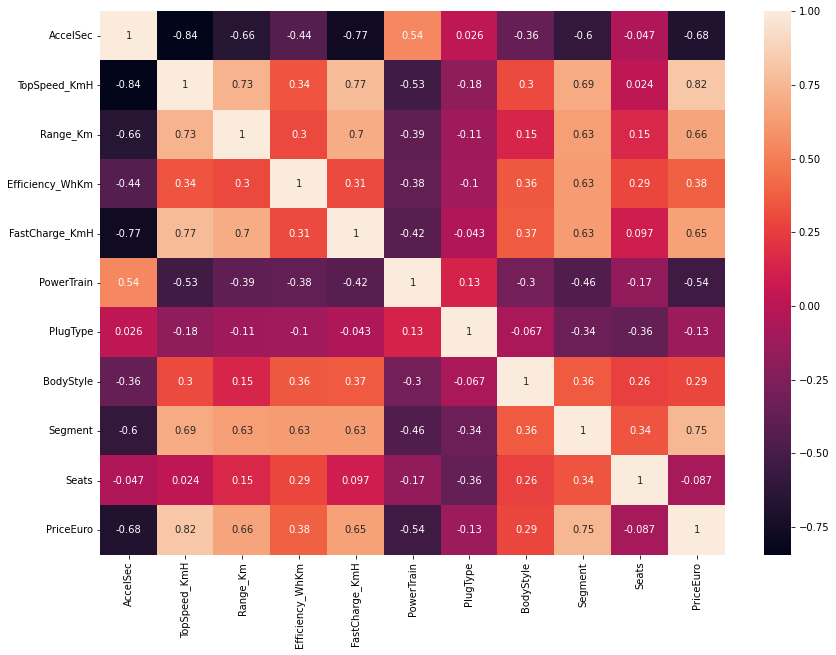

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

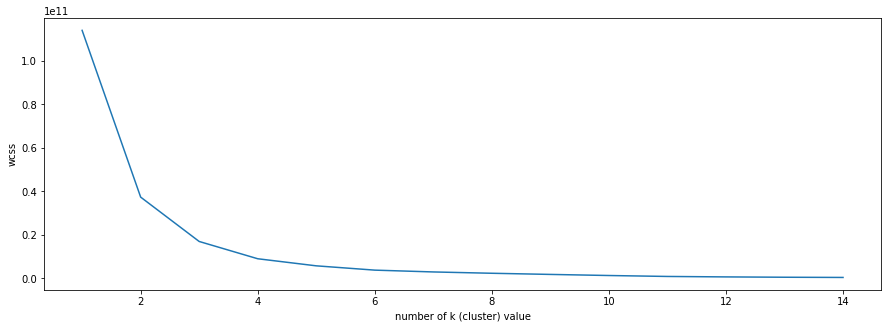

In [ ]:
wcss = []
data_model = df.drop(['Brand','Model','RapidCharge'],axis=1)
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 3.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

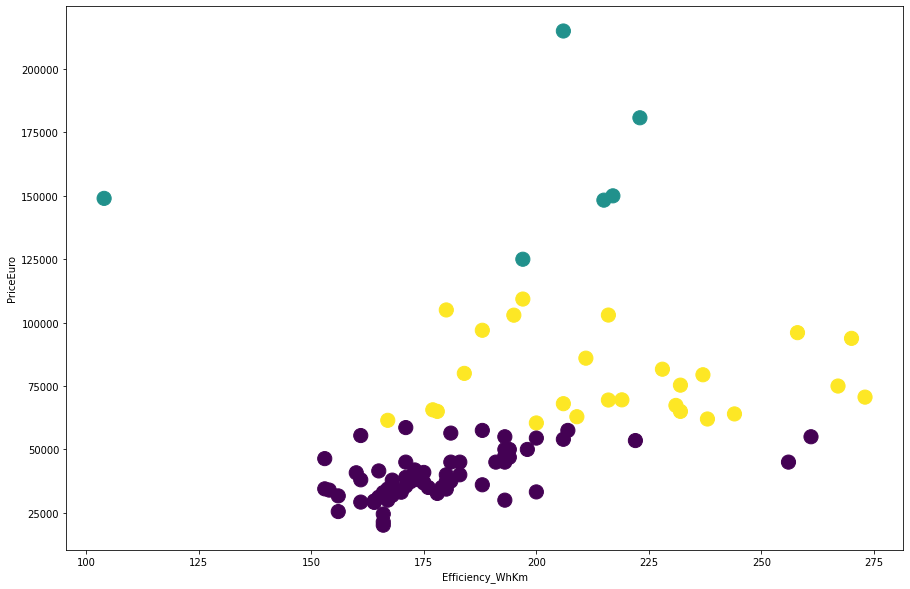

In [ ]:
kmeans = KMeans(n_clusters=3)
data_predict = kmeans.fit_predict(data_model)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Efficiency_WhKm' ,y = 'PriceEuro' , data = data_model , c = data_predict , s = 200 )
plt.xlabel("Efficiency_WhKm")
plt.ylabel("PriceEuro")
plt.show()

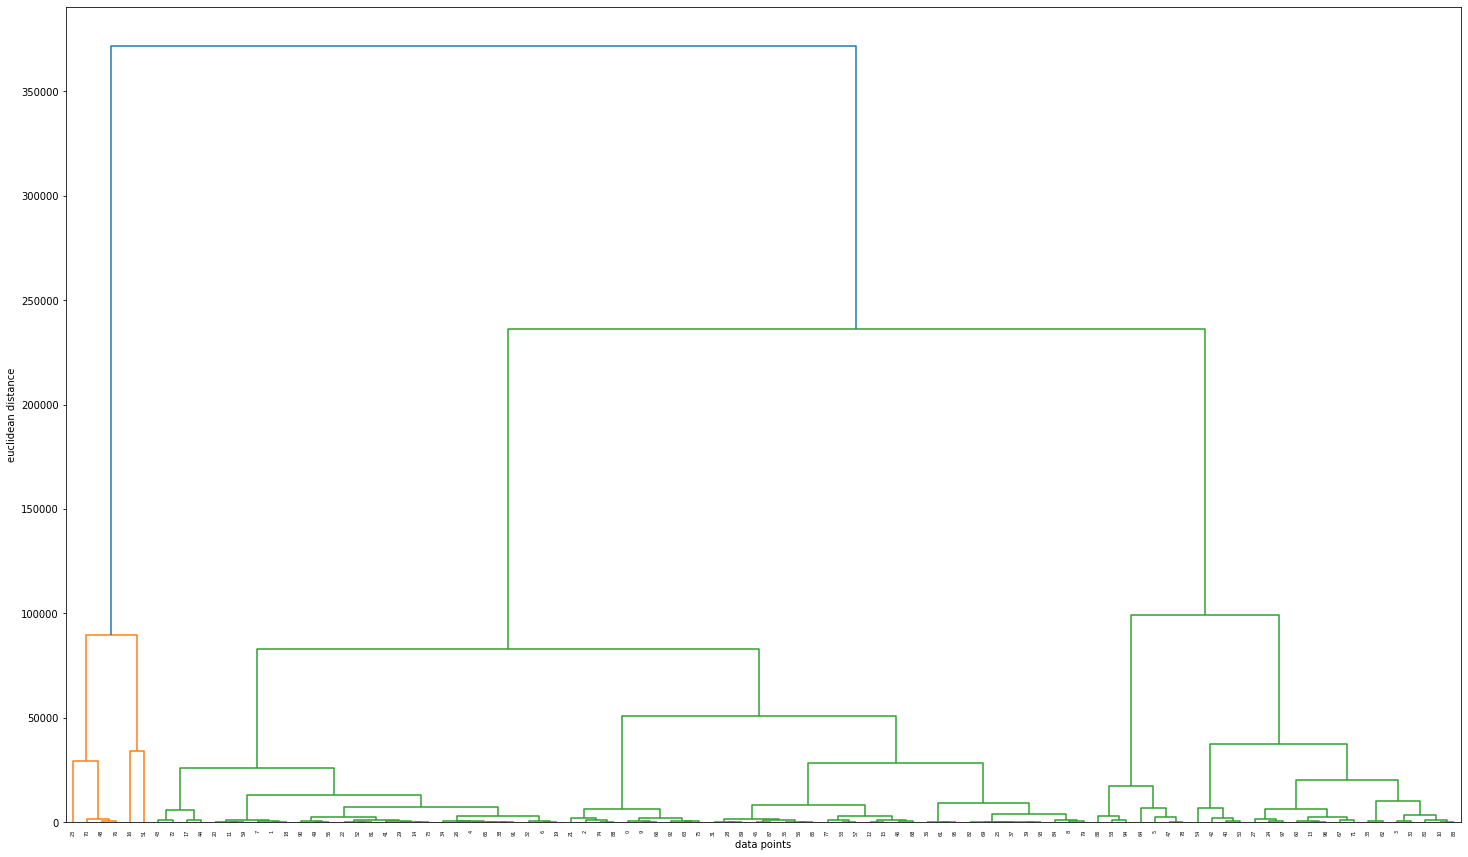

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
#create demogram and find the best clustering value
merg = linkage(data_model,method="ward")
plt.figure(figsize=(25,15))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

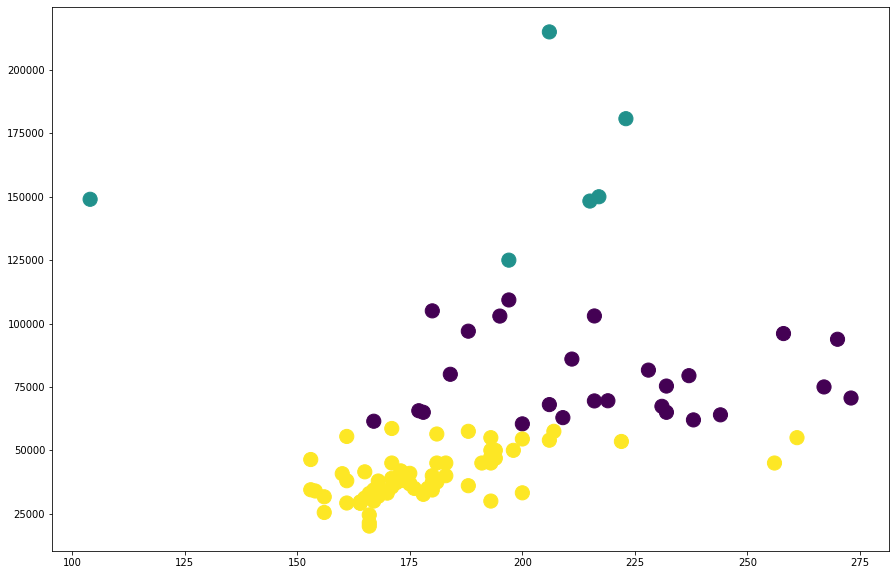

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#create model
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(data_model)
plt.figure(figsize=(15,10))
plt.scatter( x = 'Efficiency_WhKm' ,y = 'PriceEuro' , data = data_model , c = data_predict , s = 200 )
plt.show()

In [ ]:
# Arnav Sharma----->

In [ ]:
model_5_clusters = KMeans(n_clusters=3)
label_5 = model_5_clusters.fit_predict(data_model[['Efficiency_WhKm', 
                                           'PriceEuro']])

In [ ]:
data_model.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940,0,2,7,3,5,55480
1,10.0,160,270,167,250,2,2,1,2,5,30000
2,4.7,210,400,181,620,0,2,2,3,5,56440
3,6.8,180,360,206,560,2,2,6,3,5,68040
4,9.5,145,170,168,190,2,2,1,1,4,32997


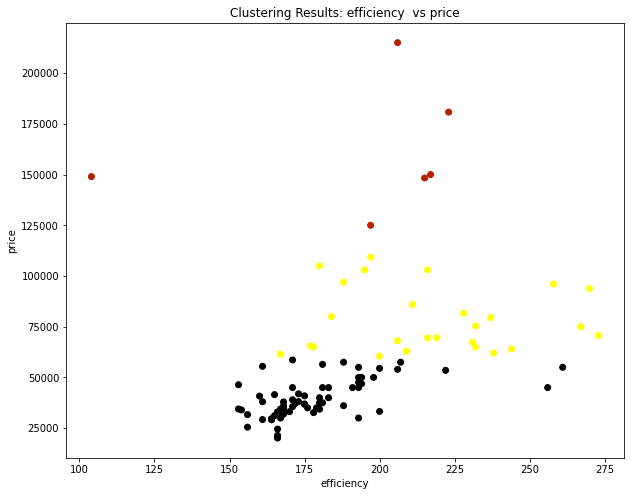

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(data_model.Efficiency_WhKm, data_model.PriceEuro, c=label_5, cmap='gnuplot')
plt.title('Clustering Results: efficiency  vs price')
plt.xlabel('efficiency')
plt.ylabel('price')
plt.show()

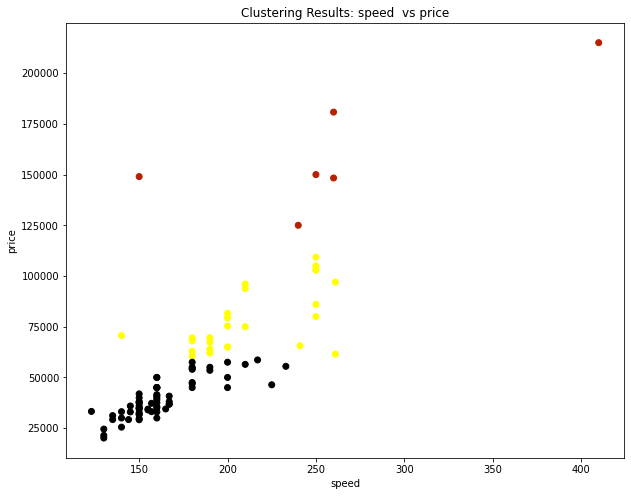

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(data_model.TopSpeed_KmH, data_model.PriceEuro, c=label_5, cmap='gnuplot')
plt.title('Clustering Results: speed  vs price')
plt.xlabel('speed')
plt.ylabel('price')
plt.show()